**PRÁCTICA 3**

Miembros del grupo:

- **Javier Quesada Pajares**
- **Miguel González García**
- **Jorge del Castillo Gómez** 

In [1]:
# Dependencias - EJECUTA ESTA CELDA ANTES DE COMENZAR

# El paquete nnfs incluye la base de datos de entrenamiento que vamos a usar, y asegura que las semillas de los métodos random sean consistentes, para que nuestros resultados sean comparables
%pip install -q nnfs
%pip install -q numpy matplotlib

import nnfs
import matplotlib.pyplot as plt
import numpy as np

nnfs.init()

# Esta función la usaremos más adelante para ver los resultados de la red
# works only for model = model = [dense1, activation1, dense2, loss_activation]

def plot_prediction_performance_spiral(
        model: list | tuple,
        X, y,
        num_points: int = 100,
        ) -> None:
    """Plots the performance of the model in the spiral dataset with 3 categories"""

    def probabilities_to_rgb(probabilities_array):
        """ Maps an array of probabilities to RGB colors."""

        # Ensure that probabilities sum up to 1 for all data points
        if not np.all(np.isclose(np.sum(probabilities_array, axis=1), 1.0)):
            raise ValueError("Probabilities must sum up to 1 for all data points.")

        # Map probabilities to RGB channels (0-255) for all data points
        r, g, b = (probabilities_array * 255).astype(int).T

        # Return the RGB colors as a NumPy array
        return np.column_stack((r, g, b))

    # Create a meshgrid of points in the (-1,1)x(-1,1) space
    x_val = np.linspace(-1, 1, num_points)
    y_val = np.linspace(-1, 1, num_points)

    x_grid, y_grid = np.meshgrid(x_val, y_val)

    # Flatten the grids into 1D arrays
    x_flat = x_grid.flatten()
    y_flat = y_grid.flatten()

    # Combine the flattened arrays into an Nx2 array
    XX_tuples = np.column_stack((x_flat, y_flat))

    # Perform a forward pass through the network
    input = XX_tuples
    for layer in model[:-1]:
        layer.forward(input)
        input = layer.output

    # Assumed last layer is a softmax activation + loss function
    # 'y_true' here is random since it will not be used
    # (only the output of the softmax is needed)
    model[-1].forward(input, y_true=np.array([0]*len(model[-2].output)))

    probabilities_array = model[-1].output
    rgb_colors = probabilities_to_rgb(probabilities_array)
    probs_2d = rgb_colors.reshape(num_points, num_points,3)

    # Assumed 3 categories - change this if different
    colors = ['r' if label == 0 else 'g' if label == 1 else 'b' for label in y]

    plt.imshow(probs_2d, extent=(-1, 1, -1, 1), interpolation='bilinear')
    plt.scatter(X[:, 0], -X[:, 1], c = colors)
    #plt.axis('off')  # Turn off axis labels and ticks
    plt.show()# print(rgb_colors)  # This will print the RGB color array
    # plt.pcolor(xx, yy, rgb_colors)
    # plt.show()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Ejercicio 1: Una neurona simple

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=neurona_simple.png&t=04gzB6Klm7RQkH6&scalingup=0" width="250"/>
</div>
</center>

Calcula el output de una neurona simple con cuatro inputs: $[1.0, 2.0, 3.0, 2.5]$, donde los correspondientes pesos son $[0.2, 0.8, -0.5, 1.0]$, y el sesgo es $2.0$.

In [2]:
# SOL EJ 1

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] +
          inputs[3] * weights[3] +
          bias
          )

print(output)

4.8


## Ejercicio 2: Una capa de neuronas

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple.png&t=IvPdbEiQJ9gFVxo&scalingup=0" width="250"/>
</div>
</center>

Calcula la salida de una capa de neuronas con cuatro entradas ($[1, 2, 3, 2.5]$) y tres neuronas:
 - Neurona 1: Pesos = $[0.2, 0.8, -0.5, 1]$, Sesgo = $2$
 - Neurona 2: Pesos = $[0.5, -0.91, 0.26, -0.5]$, Sesgo = $3$
 - Neurona 3: Pesos = $[-0.26, -0.27, 0.17, 0.87]$, Sesgo = $0.5$
  
Calcula la salida directamente sobre una lista, calculando para cada elemento las operaciones necesarias entre inputs, pesos y sesgos.


In [3]:
# SOL EJ 2

inputs = [1.0, 2.0, 3.0, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [# neurona 1
          inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
          # neurona 2
          inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
          # neurona 3
          inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3,
         ]

print(output)


[4.8, 1.21, 2.385]


# Ejercicio 3: Una capa de neuronas - generalización

Repite el ejercicio 2, pero utiliza un enfoque más general que permita realizar las mismas operaciones por neuronas de forma secuencial (utiliza un bucle ```for```). El formato de datos de entrada ahora es el siguiente:

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

In [5]:
# SOL EJ 3

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0

    for input, weight in zip(inputs, neuron_weights):
        neuron_output += input * weight

    neuron_output += neuron_bias

    layer_outputs.append(neuron_output)

print(layer_outputs)


[4.8, 1.21, 2.385]


# Ejercicio 4: Prueba de eficiencia

Copia tu solución anterior, pero ahora utiliza un tamaño creciente de los datos de entrada: $n = [5, 50, 500, 5000]$. Genera listas del tamaño apropiado para los inputs, pesos y sesgos que contengan números aleatorios entre $1$ y $3$ para las entradas y sesgos y entre $-1$ y $1$ para los pesos. Supón distribuciones uniformes. Observa el rendimiento de tu implementación cuando $n$ crece.

In [6]:
# !PEDIDO

# SOL EJ 4
# pista: usa np.random.uniform para generar arrays de números aleatorios
import time

n = [5, 50, 500, 5000, 500000]

for e in n:
    start = time.time()
    inputs = np.random.uniform(1, 3, e)
    weights = np.random.uniform(-1, 1, (3, e))
    biases = np.random.uniform(1, 3, 3)

    layer_outputs = []

    for neuron_weights, neuron_bias in zip(weights, biases):
        neuron_output = 0

        for input, weight in zip(inputs, neuron_weights):
            neuron_output += input * weight

        neuron_output += neuron_bias

        layer_outputs.append(neuron_output)

    t = (time.time() - start)
    print(layer_outputs)
    print(f"Tiempo para {e} elementos: {t:.6f} s")


[np.float64(6.501312269321404), np.float64(4.456713828510015), np.float64(1.855582421348706)]
Tiempo para 5 elementos: 0.000000 s
[np.float64(2.4950823163393347), np.float64(3.0116488277124414), np.float64(-2.4830578173714257)]
Tiempo para 50 elementos: 0.000999 s
[np.float64(6.711816917989121), np.float64(57.952132429595395), np.float64(-12.299885717541768)]
Tiempo para 500 elementos: 0.001000 s
[np.float64(-75.93334469922107), np.float64(-136.43718574749718), np.float64(143.3239558686616)]
Tiempo para 5000 elementos: 0.006994 s
[np.float64(2031.8951332493698), np.float64(-596.0103198474067), np.float64(-452.34611926624643)]
Tiempo para 500000 elementos: 0.553277 s


# Ejercicio 5: Una neurona simple usando ```numpy```

Reimplementa el ejercicio 1 usando el paquete ```numpy```


In [7]:
# SOL EJ 5

import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2.0

outputs = np.dot(inputs, weights) + bias

print(outputs)

4.8


# Ejercicio 6: Una capa de neuronas usando ```numpy```

Reimplementa el ejercicio 2 usando el paquete ```numpy```. Realiza una prueba de eficiencia similar a la que realizaste en el ejercicio 4.


In [8]:
import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2.0, 3.0, 0.5])

import time

start = time.time()
layer_output = np.dot(weights, inputs) +  biases

print(layer_output)
print(f"Tiempo: {time.time() - start:.6f} s")

[4.79999995 1.21000004 2.38499999]
Tiempo: 0.000901 s


**Prueba de eficiencia**

In [9]:
# Prueba de eficiencia
import time

n = [5, 50, 500, 5000, 500000]

for e in n:
    start = time.time()
    inputs = np.random.uniform(1, 3, e)
    weights = np.random.uniform(-1, 1, (3, e))
    biases = np.random.uniform(1, 3, 3)

    layer_outputs = []

    layer_outputs = np.dot(weights, inputs) +  biases

    t = (time.time() - start)
    print(layer_outputs)
    print(f"Tiempo para {e} elementos: {t:.6f} s")



[6.97551886 4.7158116  4.48245752]
Tiempo para 5 elementos: 0.000988 s
[ 18.75053927  -7.36386751 -11.79943266]
Tiempo para 50 elementos: 0.000000 s
[ 7.27573739 36.14324565 10.65850957]
Tiempo para 500 elementos: 0.000998 s
[-77.33607721  43.81999502   0.98489565]
Tiempo para 5000 elementos: 0.000999 s
[-494.55869295 -292.56728995  350.67753863]
Tiempo para 500000 elementos: 0.028622 s


# Ejercicio 7: Una capa de neuronas con datos en *batch*

Implementa el *forward pass* de una neurona simple asumiendo que la entrada son datos en lote (*batch*). Es decir, la entrada ahora será una matriz, donde cada fila corresponderá a una observación. Por tanto, la salida también será de dimensión 2. Considera los datos dados a continuación:

In [10]:
import numpy as np

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
         [0.5, -0.91, 0.26, -0.5],
         [-0.26, -0.27, 0.17, 0.87]])
bias = np.array([2.0, 3.0, 0.5])

In [11]:
# SOL EJ 7
layer_output = np.dot(inputs, weights.T) + bias

print(layer_output)

[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]


# Ejercicio 8: Red neuronal con una *hidden layer*

Implementa el *forward pass* de una red con la siguiente arquitectura: una capa de entrada (4 inputs), una hidden layer de 3 neuronas y una capa de salida también con 3 neuronas. Utiliza los datos dados a continuación:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=red_simple.png&t=IkHbjPoTjUPoGWt&scalingup=0" width="250"/>
</div>
</center>



In [12]:
import numpy as np

inputs = np.array([
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
])

weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

biases = np.array([2, 3, 0.5])

weights2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
])

biases2 = np.array([-1, 2, -0.5])

In [13]:
# SOL EJ 8
layer1_outputs = np.dot(inputs, weights.T) + biases
layer2_outputs = np.dot(layer1_outputs, weights2.T) + biases2

print(layer2_outputs)

[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]


# Ejercicio 9: Capa de neuronas usando Programación Orientada a Objetos

Crea una clase llamada ```Layer_Dense```, cuyos parámetros de entrada sean ```n_inputs``` (número de inputs a la capa) y ```n_neurons``` (número de neuronas que contiene la capa). Además, en su constructor deben inicializarse dos variables:
 - ```self.weights```: una matriz que contenga los pesos. Deben inicializarse en números aleatorios entre 0 y 0.01.
 - ```self.biases```: un vector columna que contenga los sesgos. Deben inicializarse en $0$.

Implementa un único método llamado ```forward(self, inputs)``` que, dados unos inputs a la capa, realice el *forward pass*.

In [14]:
#SOL EJ 9
import numpy as np

class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) # No hace falta trasponer mas adelante
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

dense1 = Layer_Dense(4, 3)

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])

dense1.forward(inputs)

print(dense1.output)

[[-0.07962707  0.02927851 -0.03297667]
 [-0.03472039  0.12439236  0.02765453]
 [-0.05764943  0.0315914   0.02578621]]


# Ejercicio 10: *Forward pass* de datos de entrenamiento — Triple espiral

A continuación se describe un problema de clasificación con tres categorías. La base de datos mostrada abajo ha sido generada a partir de la ecuación de 3 espirales distintas, añadiendo ruido. Se trata de un problema complejo por su alta no-linealidad. Observa toda la base de datos:

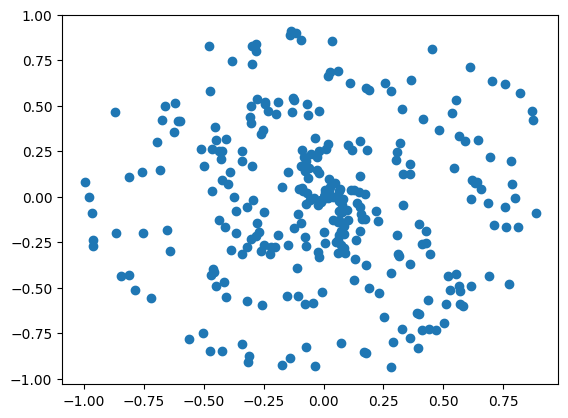

In [15]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()


Resaltando por colores cada categoría se aprecia mejor su naturaleza:

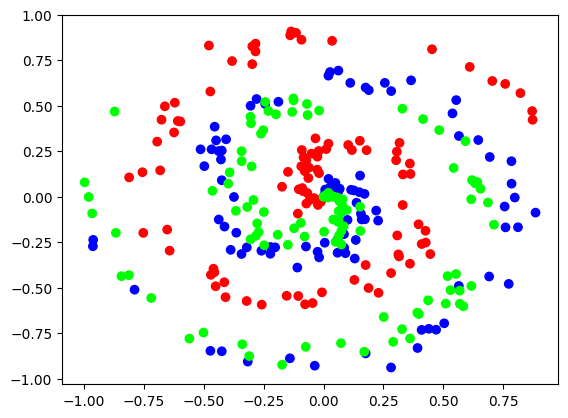

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Realiza un *forward pass* de los datos de entrada ```X``` en una capa de 3 neuronas.

In [17]:
# SOL EJ 10

import nnfs
import numpy as np

# Set seed for reproducibility. Keep this!
nnfs.init()

X, y = spiral_data(samples=100, classes=3)

# 2 es el número de features de cada instancia de mi bd
dense1 = Layer_Dense(2, 3)

dense1.forward(X)

print(dense1.output)
print(f"{len(dense1.output)=}")

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.04751882e-04  1.13953611e-04 -4.79834998e-05]
 [-2.74148420e-04  3.17291502e-04 -8.69217984e-05]
 [-4.21883655e-04  5.26662567e-04 -5.59126820e-05]
 [-5.77076804e-04  7.14014051e-04 -8.94304394e-05]
 [-3.54306976e-04  3.50254879e-04 -2.33634812e-04]
 [-8.92670010e-04  1.07678759e-03 -1.94532375e-04]
 [-9.33507807e-04  1.07238023e-03 -3.12273973e-04]
 [-1.12437585e-03  1.31128007e-03 -3.36296740e-04]
 [-1.33869553e-03  1.62009057e-03 -2.81017943e-04]
 [-1.48779724e-03  1.79484230e-03 -3.23859538e-04]
 [-1.20035873e-03  1.58119109e-03  8.65937000e-06]
 [-1.56528328e-03  1.99173321e-03 -1.30997345e-04]
 [-1.85718178e-03  2.30642664e-03 -2.70479388e-04]
 [-1.78093580e-03  2.27836682e-03 -1.24245722e-04]
 [-1.85300526e-03  2.38476763e-03 -1.00471654e-04]
 [-6.99865050e-04  1.11472746e-03  3.96097894e-04]
 [-2.19024252e-03  2.79446482e-03 -1.68075712e-04]
 [-1.69829139e-03  2.29598465e-03  1.31671681e-04]
 [-2.60229013e-03  3.27291898e-

# Ejercicio 11: Función de activación ReLU

Programa una clase llamada ```Activation_ReLU``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación ReLU a los inputs pasados como argumento.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=relu.png&t=reweQCjpTXGOQZ4&scalingup=0" width="350"/>
</div>
</center>


In [18]:
# SOL EJ 11

class Activation_ReLU:

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# Ejercicio 12: Función de activación ```Softmax```
El objetivo de este ejercicio es llegar a una clase llamada ```Activation_Softmax``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación Softmax a los inputs pasados como argumento. En teoría la función Softmax se formula como

$$
S_{i, j}=\frac{e^{z_{i, j}}}{\sum_{l=1}^L e^{z_{i, l}}}
$$
siendo los $z_j$ el output de la neurona $j$ (y por tanto, input de la función de activación). El índice $i$ hace referencia a la observación $i$ considerada.

Para conseguir una implementación robusta, haremos alguna modificación en la formulación anterior. Siguie el siguiente proceso:


 - **12.a** Dada una única observación ```layer_outputs = [4.8, 1.21, 2.385]``` (se supone salida de una capa), aplica la función Softmax anterior (de momento, no es necesario que programes ninguna clase).

In [19]:
# SOL EJ 12a
layer_outputs = [4.8, 1.21, 2.385]

exp_values = np.exp(layer_outputs)

normalized_values = exp_values / np.sum(exp_values)

print(normalized_values)

[0.89528266 0.02470831 0.08000903]


 - **12.b** Dados los siguientes datos en lote, aplica la función Softmax a cada observación.

In [20]:
# SOL EJ 12b

layer_outputs = np.array([[4.8, 1.21, 2.385],
                            [8.9, -1.81, 0.2],
                            [1.41, 1.051, 0.026]])

exp_values = np.exp(layer_outputs)

# Mantiene la forma (n, 1), siendo n el tamaño de batch. En este caso, 3.
norm_factor = np.sum(exp_values, axis=1, keepdims=True)

normalized_values = exp_values / norm_factor

print(normalized_values)
exp_values

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


array([[1.21510418e+02, 3.35348465e+00, 1.08590627e+01],
       [7.33197354e+03, 1.63654137e-01, 1.22140276e+00],
       [4.09595540e+00, 2.86051020e+00, 1.02634095e+00]])

 - **12.c** En el proceso de exponenciación anterior, resta al input considerado el máximo valor de dicha observación. Esto pretende evitar que los valores se disparen al exponenciar (*exloding values*). Así mismo, encapsula el código anterior en una clase ```Activation_Softmax``` que implemente únicamente un método: ```forward(self, inputs)```


In [21]:
# SOL EJ 12c

class Activation_Softmax:

    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Ejercicio 13: *Forward pass* de una red con funciones de activación

Dado un conjunto de datos de entrada $X$, construye una red neuronal que conste de dos capas densas y funciones de activación ReLU y Softmax. El objetivo es realizar un *forward pass* a través de esta red. Los datos de entrada corresponde con los presentados en el ejercicio 10:

In [22]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

La arquitectura de la red debe ser:
 - Input de dos features (las coordenadas de los puntos)
 - Hidden layer, con entrada de 2 valores y salida de 3. Función de activación ReLU.
 - Capa de salida, con entrada de 3 valores y salida también de 3 valores (correspondientes a las tres categorías del problema de clasificación). Función de activación Softmax.

Realiza un forward pass de los datos hasta la última función (softmax) e imprime por pantalla el output para las 5 primeras observaciones. Reutiliza las clases implementadas en ejercicios anteriores.

In [23]:
# SOL EJ 13

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


# Ejercicio 14: Función de pérdidas — entropía cruzada. Caso particular

Imagina que estamos tratando de clasificar entre las categorías "perro", "gato" o "humano". Un perro es la clase 0 (en el índice 0), un gato la clase 1 (índice 1) y un humano la clase 2 (índice 2). Supongamos que tenemos una arquitectura como la del ejercicio anterior y que tenemos un batch de tres observaciones, que han dado lugar a los siguientes valores de salida en la última capa:

In [24]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],  # perro -> índice 0
                            [0.1, 0.5, 0.4],  # gato -> índice 1
                            [0.02, 0.9, 0.08]])  # gato -> índice 1


Recuerda que estos valores representan la **confianza del modelo en cada clase**, para cada observación. Disponemos también de las etiquetas (valores objetivo) para estas tres observaciones: son un perro, un gato y un gato:

In [25]:
class_targets = [0, 1, 1] # perro, gato, gato

# FORMA 1 DE DAR LOS VALORES OBJETIVO y: SPARSE VALUES
# observacion 0 -> perro -> 0
# observacion 1 -> gato -> 1
# observacion 2 -> gato -> 1

# FORMA 2 DE DAR LOS VALORES OBJETIVO y: ONE-HOT VECTORS
# observacion 0 -> "SÍ es un perro, NO es un gato, NO es un humano" -> [1, 0, 0]
# observacion 1 -> "NO es un perro, SÍ es un gato, NO es un humano" -> [0, 1, 0]
# observacion 2 -> "NO es un perro, SÍ es un gato, NO es un humano" -> [0, 1, 0]


La fórmula para calcular la entropía cruzada categórica de *y* (distribución real/deseada) e *y-hat* (distribución predicha) es:
$$
L_i=-\sum_j y_{i, j} \log \left(\hat{y}_{i, j}\right)
$$
donde $L_i$ indica el valor de pérdida de la muestra, $i$ es la muestra $i$-ésima del conjunto, $j$ es la hace referencia al valor $j$-ésimo en la salida, $y$ son los valores objetivo (conocidos de antemano) e $\hat{y}$ son los valores predichos (salida de la red).

Calcula la entropía cruzada categórica para cada observación del batch anterior, así como una media para todo el batch.

In [26]:
# SOL EJ 14

for targ_idx, distribution in zip(class_targets, softmax_outputs):
    print(distribution[targ_idx])

print(softmax_outputs[[0,1,2], class_targets])

print(softmax_outputs[range(len(softmax_outputs)), class_targets])

0.7
0.5
0.9
[0.7 0.5 0.9]
[0.7 0.5 0.9]


In [27]:
# Probabilidades de las clases correctas. Selecciona las probabilidades de las clases verdaderas para cada muestra.
probabilities_of_target = softmax_outputs[range(len(softmax_outputs)), class_targets]
print(probabilities_of_target)
# Cálculo de la pérdida negativa del logaritmo (cross-entropy loss)
negative_log_probs = - np.log(probabilities_of_target)
# Promediamos la pérdida
average_loss = np.mean(negative_log_probs)

print(f'Average Loss: {average_loss}')

[0.7 0.5 0.9]
Average Loss: 0.38506088005216804


# Ejercicio 15: Función de pérdidas — entropía cruzada usando POO

Observa la siguiente clase abstracta:

In [28]:
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
         - output: output of the last layer of the network
         - y: ground truth
        """
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

 - **15.a** A partir del ejercicio 14, implementa una clase llamada ```Loss_CategoricalCrossentropy``` que herede de la clase abstracta anterior e implemente el método ```forward```, para el caso de una función de pérdida tipo entropía cruzada categórica.

In [29]:
# SOL EJ 15a

class Loss_CategoricalCrossentropy(Loss):

    def forward(self, output, y):
        sample = len(output)

        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)  # evita inestabilidades en la evaluación del logaritmo. Acota las probabilidades, de modo que cualquier
                                                          # valor menor que min_value = 1e-7 se reemplaza por min_value; lo mismo para max_value = 1 - 1e-7
        # Obtiene las probabilidades correctas devueltas por la softmax a las "y"
        correct_confidences = y_pred_clipped[range(sample), y]

        negative_log_probs = - np.log(correct_confidences)

        return negative_log_probs

 - **15.b** Repite el *forward pass* del ejercicio 13, pero incluye el cálculo final de la función de pérdidas usando la implementación anterior

In [30]:
#!# PEDIDO
# SOL EJ 15b


dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

dense1.forward(X[0])
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss = loss_function.calculate(activation2.output, y)

print(activation2.output[:5])
print(loss)


[[0.33333334 0.33333334 0.33333334]]
1.0986123


 - **15.c** Aunque la pérdida es una métrica útil para optimizar un modelo, hay otra métrica que se suele utilizar en la práctica junto con la pérdida: la *precisión*, que describe con qué frecuencia la mayor confianza corresponde a la clase correcta. Añade al código del apartado 'b' el cálculo de la precisión.

In [31]:
#!# PEDIDO
# SOL EJ 15c

# Se obtienen las prediciones de la softmax con mayor probabilidad y devuelve la clase numerica
pred = np.argmax(activation2.output, axis=1)

accuracy = np.mean(pred == y)
print(accuracy)

0.3333333333333333


# Ejercicio 16: Optimización — modificación aleatoria de pesos (I)

Observa los siguientes datos de entrenamiento, que también definen un problema de clasificación multiclase, pero de una naturaleza más sencilla que el de la triple espiral visto hasta ahora

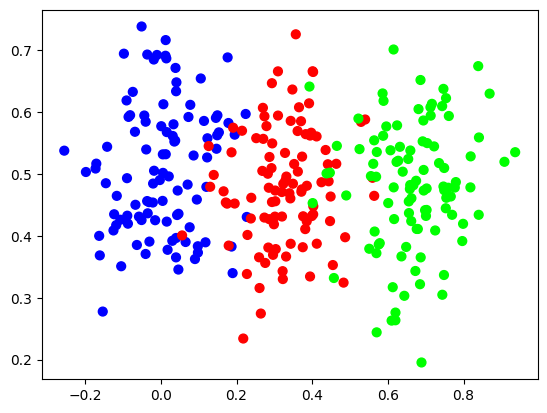

In [32]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()



Utilizando la estructura computacional del ejercicio anterior, realiza un proceso iterativo (máximo 10000 iteraciones) en el que se vayan cambiando los pesos y sesgos de ambas capas de forma aleatoria (distribución normal de media 0 y varianza 0.05). Almacena el resultado que dé lugar a una menor pérdida. Comenta el decrecimiento de la función de pérdidas durante el proceso.

In [33]:
# SOL EJ 16
# Pista - usa 0.05 * np.random.randn para generar los arrays de números aleatorios que necesites
nnfs.init()

# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 99999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases  = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases  = dense2.biases.copy()

for iteration in range(10000):
    dense1.weights = 0.05 * np.random.randn(2,3)  # -> Revisar documentación de randn
    dense1.biases  = 0.05 * np.random.randn(1,3)
    dense2.weights = 0.05 * np.random.randn(3,3)
    dense2.biases  = 0.05 * np.random.randn(1,3)

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0986564
New set of weights found, iteration: 3 loss: 1.098138
New set of weights found, iteration: 117 loss: 1.0980115
New set of weights found, iteration: 124 loss: 1.0977516
New set of weights found, iteration: 165 loss: 1.0975711
New set of weights found, iteration: 552 loss: 1.0974693
New set of weights found, iteration: 778 loss: 1.0968257
New set of weights found, iteration: 4307 loss: 1.0965533
New set of weights found, iteration: 4615 loss: 1.0964499
New set of weights found, iteration: 9450 loss: 1.0964295


# Ejercicio 17: Optimización — modificación aleatoria de pesos (II)

 - **17.a** Repite el ejercicio anterior con un enfoque ligeramente distinto: en lugar de fijar nuevos parámetros elegidos al azar en cada iteración, suma una fracción aleatoria (distribución normal de media 0 y varianza 0.05) a los parámetros actuales y comprueba si esos nuevos valores dan lugar a una pérdida menor. Comenta si este enfoque funciona mejor o peor que el anterior.


In [34]:
# SOL EJ 17a

# SOL EJ 16
# Pista - usa 0.05 * np.random.randn para generar los arrays de números aleatorios que necesites
nnfs.init()

# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 99999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases  = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases  = dense2.biases.copy()

for iteration in range(10000):
    

    og_dense1_weights = dense1.weights.copy()
    og_dense1_biases  = dense1.biases.copy()
    og_dense2_weights = dense2.weights.copy()
    og_dense2_biases  = dense2.biases.copy()
    

    dense1.weights += 0.05 * np.random.randn(2,3)  # -> Revisar documentación de randn
    dense1.biases  += 0.05 * np.random.randn(1,3)
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases  += 0.05 * np.random.randn(1,3)

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = og_dense1_weights
        dense1.biases  = og_dense1_biases
        dense2.weights = og_dense2_weights
        dense2.biases  = og_dense2_biases

New set of weights found, iteration: 0 loss: 1.0987684
New set of weights found, iteration: 1 loss: 1.0987465
New set of weights found, iteration: 5 loss: 1.0976487
New set of weights found, iteration: 6 loss: 1.0972018
New set of weights found, iteration: 10 loss: 1.0938749
New set of weights found, iteration: 19 loss: 1.0935849
New set of weights found, iteration: 20 loss: 1.0908297
New set of weights found, iteration: 21 loss: 1.0905013
New set of weights found, iteration: 22 loss: 1.0879314
New set of weights found, iteration: 24 loss: 1.0856307
New set of weights found, iteration: 25 loss: 1.0801181
New set of weights found, iteration: 29 loss: 1.0725244
New set of weights found, iteration: 30 loss: 1.0724432
New set of weights found, iteration: 31 loss: 1.0636086
New set of weights found, iteration: 32 loss: 1.0599552
New set of weights found, iteration: 35 loss: 1.0583049
New set of weights found, iteration: 36 loss: 1.0570958
New set of weights found, iteration: 39 loss: 1.0469

 - **17.b** Prueba también este enfoque con los datos de la triple espiral.

In [35]:
# SOL EJ 17b

# Pista - usa 0.05 * np.random.randn para generar los arrays de números aleatorios que necesites
nnfs.init()

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 99999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases  = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases  = dense2.biases.copy()

for iteration in range(10000):
    

    og_dense1_weights = dense1.weights.copy()
    og_dense1_biases  = dense1.biases.copy()
    og_dense2_weights = dense2.weights.copy()
    og_dense2_biases  = dense2.biases.copy()
    

    dense1.weights += 0.05 * np.random.randn(2,3)  # -> Revisar documentación de randn
    dense1.biases  += 0.05 * np.random.randn(1,3)
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases  += 0.05 * np.random.randn(1,3)

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = og_dense1_weights
        dense1.biases  = og_dense1_biases
        dense2.weights = og_dense2_weights
        dense2.biases  = og_dense2_biases

New set of weights found, iteration: 0 loss: 1.1008677
New set of weights found, iteration: 1 loss: 1.0994315
New set of weights found, iteration: 2 loss: 1.0991219
New set of weights found, iteration: 3 loss: 1.0986339
New set of weights found, iteration: 4 loss: 1.0986199
New set of weights found, iteration: 5 loss: 1.0984716
New set of weights found, iteration: 18 loss: 1.0983391
New set of weights found, iteration: 27 loss: 1.0982698
New set of weights found, iteration: 31 loss: 1.0982264
New set of weights found, iteration: 35 loss: 1.0979562
New set of weights found, iteration: 36 loss: 1.0977433
New set of weights found, iteration: 37 loss: 1.0976934
New set of weights found, iteration: 44 loss: 1.0975959
New set of weights found, iteration: 50 loss: 1.0973785
New set of weights found, iteration: 51 loss: 1.0959908
New set of weights found, iteration: 60 loss: 1.0959282
New set of weights found, iteration: 65 loss: 1.0954362
New set of weights found, iteration: 67 loss: 1.093989

# Ejercicio 18: Introducción a la *backpropagation*

La siguiente imagen corresponde a una simple neurona + f. activación, con 3 inputs. Los valores de inputs, pesos y sesgo se han fijado aleatoriamente. En la imagen también se indica en rojo el valor del gradiente recibido de una capa posterior (en este ejemplo, $1$):

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple_gradiente.png&t=nJHrGFJQ8VVuZK7&scalingup=0" width="500"/>
</div>
</center>

Pensemos en esta neurona como una gran función, cuyas variables independientes o parámetros de entrada son los inputs, pesos y sesgo. Esta gran función consiste en varias funciones más simples: hay una multiplicación de inputs y pesos, suma de estos valores y el sesgo, así como una la función activación ReLU - 3 funciones encadenadas en total:
$$
\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)
$$
Para calcular cómo afecta cada variable al resultado, debemos calcular sus derivadas parciales. Como hay varias funciones combinadas, debemos aplicar la regla de la cadena.

Calcula cómo impacta en **el input $x_0$** el gradiente recibido, es decir:

$$
\begin{aligned}
& \frac{\partial}{\partial x_0}\left[\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)\right]
\end{aligned}
$$

In [36]:
# SOL EJ 18

w = [-3, -1, 2]
x = [1, -2, 3]
b = 1

dvalue = 1

input_relu = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + b
dL_dx0 = dvalue * (1.0 if input_relu > 0 else 0.0) * w[0]

print(dL_dx0)

-3.0


# Ejercicio 19: Capa densa con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 9, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass (excluyendo la función de activación). El parámetro ```dvalues``` es una matriz donde cada fila se refiere a una observación del batch, y cada elemento de dicha fila es el gradiente llegado de aguas abajo. Dicho método debe calcular los valores ```self.dweights```, ```self.dbiases``` y ```self.dinputs``` que recogen las distintas derivadas parciales para cada parámetro. Presta atención a las dimensiones.

In [37]:
# SOL EJ 19

import numpy as np

class Layer_Dense:

    def __init__(self, n_inputs, n_neuronas):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neuronas)
        self.biases = np.zeros((1, n_neuronas))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Pista - para cuadrar las dimensiones en las multiplicaciones, recuerda que:
        # - 'dvalues' tiene la misma dimensión que la salida de la capa: (batch_size (fila), n_neurons (columna))
        # - Cada gradiente debe tener las mismas dimensiones que los parámetros correspondientes: e.g. self.dweights debe tener las mismas dimensiones que las que tenía self.weights (recuerda que en este caso eran (n_inputs, n_neurons))

        # Es el gradiente de la pérdida con respecto a los pesos de la capa. Se multiplica por inputs porque este es el coeficiente de los pesos (derivada del peso (x * input) es input)
        # No se hace una suma como en los biases porque se calcula el gradiente de los pesos considerando todas las muestras del batch. Queremos tener en cuenta la contribucion de todas las muestras, no solo la de una muestra.
        self.dweights = np.dot(self.inputs.T, dvalues) # para actualizar los pesos

        # Se calcula sumando los valores de dvalues a lo largo del batch (es decir, sumando las derivadas de la pérdida con respecto a las salidas de cada neurona a través de todas las muestras del batch).
        # Se realiza una suma porque el sesgo es un valor único para todas las muestras, por lo tanto, el gradiente acumulado de cada muestra es lo que nos da el ajuste necesario.
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True) # para actualizar el bias
        
        # dinputs es el gradiente de la función de pérdida con respecto a las entradas de la capa. Este gradiente se utiliza para propagar la información hacia atrás a las capas anteriores en la red neuronal. 
        # en otras palabras, dinputs es lo que le dice a la capa anterior cuánto debe ajustar sus entradas para minimizar la función de pérdida.
        self.dinputs = np.dot(dvalues, self.weights.T) # para enviar mas atras el gradiente acumulado


# Ejercicio 20: ReLU con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 11, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.

In [38]:
# SOL EJ 20

class Activation_ReLU:

    def forward(self, inputs):

        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        # La derivada de ReLU es 1 para entradas mayores que 0, y 0 para entradas menores o iguales a 0.
        # Por lo tanto, establecemos a 0 los gradientes correspondientes a las entradas menores o iguales a 0.
        # Esto asegura que solo se propague el gradiente donde la entrada fue positiva.
        self.dinputs[self.inputs <= 0] = 0.0

# Ejercicio 21: Función de pérdidas con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 15, incluyendo un nuevo método llamado ```backward(self, dvalues, y_true)``` que implemente el backward pass. El parámetro ```dvalues``` son los valores predichos ($\hat{y}_{i,j}$) y ```y_true``` son los valores objetivo. El método debe calcular los valores ```self.dinputs```, el vector derivada respecto a los inputs. Ten en cuenta lo siguiente:
 - Debes convertir los ```y_true``` en *one-hot* vectors.
 - Una vez calcules la derivada según el desarrollo teórico, normaliza el resultado. Esto evitará problemas con muestras grandes en pasos posteriores. Simplemente divide el resultado final por la longitud de la muestra (```len(dvalues)```)

In [39]:
#!# PEDIDO
# SOL EJ 21
from abc import ABC, abstractmethod

# ya implementada más arriba, sin cambios, la dejo aquí también para que quede a mano

class Loss_CategoricalCrossentropy(Loss):  # ya estaba implementada

    def forward(self, output, y):
        sample = len(output)

        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)  # evita inestabilidades en la evaluación del logaritmo

        correct_confidences = y_pred_clipped[range(sample), y]

        negative_log_probs = - np.log(correct_confidences)

        return negative_log_probs


    def backward(self, y_hat, y_true):
        # Número de muestras -> obtenla apropiadamente de las dimensiones de y_hat
        samples = len(y_hat)

        # Número de etiquetas en cada muestra -> obtenla apropiadamente de las dimensiones de y_hat. Se usará en la siguiente operación
        labels = y_hat.shape[1]

        # y_true inicialmente es un array 1D de índices de clases, necesitamos convertirlo a vectores one-hot
        y_true = np.eye(labels)[y_true]

        # Calcula el gradiente directamente, aprovechando las propiedades de los arrays de numpy
        self.dinputs = -y_true / y_hat

        # Normaliza el gradiente
        self.dinputs = self.dinputs / samples


## Ejercicio 22: SoftMax con *backpropagation*

Se pretende extender la implementación que hiciste en el ejercicio 12, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.
 - **22a.** Comienza calculando un caso particular. Supón que la salida de la función Softmax ha sido ```softmax_output = [0.7, 0.1, 0.2]```. El resultado debe ser una matriz (el Jacobiano) de dimensión $3x3$.
---
La matriz jacobiana es una matriz de derivadas parciales que describe cómo cambian las salidas de un sistema (o una función vectorial) con respecto a los cambios en las entradas. En el contexto de redes neuronales, el jacobiano se utiliza para describir cómo varían las salidas de la red con respecto a sus entradas, y en particular, se usa en la retropropagación para calcular los gradientes.

Cuando aplicamos Softmax a un vector de entradas, generamos un vector de probabilidades que suman 1. La salida de Softmax para una entrada z = [z1,z2,...zn] es:

$$
S_{i, j}=\frac{e^{z_{i, j}}}{\sum_{l=1}^L e^{z_{i, l}}}
$$

La matriz jacobiana de la función Softmax nos dice cómo cambiarán las probabilidades predichas con respecto a los valores de entrada.

Si softmax_output = [0.7, 0.1, 0.2], entonces la matriz jacobiana tiene una forma 3x3, ya que hay 3 clases (tres probabilidades de salida) y para cada salida se calcula cómo cambia con respecto a cada entrada (las z). El numero de columnas es el numero de entradas de la softmax.

- Los elementos de la diagonal son las derivadas de cada probabilidad respecto a su propia entrada.

$$\frac{\partial \hat{y}_i}{\partial z_i}=\hat{y}_i\left(1-\hat{y}_i\right)$$

- Los elementos fuera de la diagonal corresponden con las derivadas de una probabilidad con respecto a la entrada de otra clase.

$\frac{\partial \hat{y}_i}{\partial z_j}=-\hat{y}_i \hat{y}_j \quad$ para $\quad i \neq j$

Una matriz jacobiana puede tener los siguientes valores: 
$$J=\left[\begin{array}{ccc}0.21 & -0.07 & -0.14 \\ -0.07 & 0.09 & -0.02 \\ -0.14 & -0.02 & 0.16\end{array}\right]$$

Una vez calculada la matriz jacobiana, se multiplica por el gradiente devuelto por la funcion perdida respecto la salida de la softmax. Si ```softmax_output = [0.7, 0.1, 0.2]```, e ```y = [1,0,0]```, el gradiente de la perdida crossentropy respecto la softmax es: ${\hat{y} - {y}_i}$ ==> el gradiente que recibe la softmax seria [0.7 - 1, 0.1 - 0, 0.2 - 0]

Queda:  $\frac{\partial \text { Loss }}{\partial z}=J \cdot \frac{\partial \text { Loss }}{\partial \hat{y}}$ 

El gradiente que retorna el backward de la softmax tiene el mismo tamaño que z



In [40]:
#!# PEDIDO
# SOL 22a

import numpy as np

single_output = np.array([[0.7, 0.1, 0.2,]])


jacobian_matrix = np.zeros((single_output.shape[1], single_output.shape[1]))

for i in range(single_output.shape[1]):
    for j in range(single_output.shape[1]):
        if i == j:
            jacobian_matrix[i, j] = single_output[0,i] * (1 - single_output[0,i])
        else:
            jacobian_matrix[i, j] = -single_output[0,i] * (single_output[0,j])


print(jacobian_matrix)
# print(jacobian)

[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]


 - **22b.** Generaliza el código anterior. Extiende la clase del ejercicio 12 con el método llamado ```backward(self, dvalues)```. A continuación se incluye una plantilla de desarrollo que debe ser completada. Recuerda copiar el resto de métodos de la clase.

In [41]:
#!# PEDIDO
# SOL 22b
# SOL EJ 12c
class Activation_Softmax:

    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    # Paso hacia atrás
    def backward(self, dvalues):
        # Crear un array no inicializado con la misma dimensión que dvalues
        self.dinputs = np.empty_like(dvalues)

        # Enumerar salidas y gradientes
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)): # Por cada muestra del batch
            # Aplanar el array de salida - usa 'reshape'
            single_output = single_output.reshape(-1, 1) # convertir en columna

            # Calcular la matriz Jacobiana de la salida
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T) # np.dot(single_output, single_output.T) es la matriz de multiplicación de matrices

            # Calcular el gradiente por muestra y añadirlo al array de gradientes por muestra
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues) 


# Ejercicio 23: Softmax + entropía cruzada

Al calcular juntas las derivadas de la función Softmax y la función de pérdidas de entropía cruzada categórica, los cáluclos se simplifican notablemente. Implementa el método que hace el *backward pass* (i.e. ```backward(self, dvalues, y_true)```) de nueva clase llamada ```Activation_Softmax_Loss_CategoricalCrossentropy``` (el resto de métodos se dan ya implementados). Recuerda normalizar el resultado dividiéndolo por el número de muestras (```len(dvalues)```) para evitar problemas en pasos futuros.

In [42]:
# SOL EJ 23

class Activation_Softmax_Loss_CategoricalCrossentropy:

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)

        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, y_hat, y_true):
        samples = len(y_hat)

        self.dinputs = y_hat.copy()

        self.dinputs[range(samples), y_true] -= 1

        # Normalization -> para evitar "valores explosivos"
        self.dinputs = self.dinputs / samples


# Ejercicio 24: Comprobación Softmax + entropía cruzada

Se pretende comprobar si el *backpropagation* combinado (Softmax + entropía cruzada) devuelve los mismos valores en comparación con cuando retropropagamos gradientes a través de ambas funciones por separado. Para este ejemplo, vamos a crear una salida de la función Softmax y algunos valores objetivo. Retropropágalos utilizando ambas soluciones, y comprueba que obtienes los mismos resultados

In [43]:
#!# PEDIDO
# SOL EJ 24

import numpy as np
import nnfs

nnfs.init()

# Valores de ejemplo: salidas de la función Softmax y etiquetas de clase objetivo
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])

# Método Combinando Softmax y entropía cruzada en un solo objeto
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dinputs_combined = softmax_loss.dinputs

# Método separando Softmax y entropía cruzada
activation = Activation_Softmax()
loss = Loss_CategoricalCrossentropy()
activation.output = softmax_outputs
loss.backward(activation.output, class_targets)
activation.backward(loss.dinputs)
dinputs_separate = activation.dinputs

# Imprimir los gradientes obtenidos
print(f'Gradients: combined loss and activation: {dinputs_combined}')
print(f'Gradients: separate loss and activation: {dinputs_separate}')


Gradients: combined loss and activation: [[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separate loss and activation: [[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]


## Ejercicio 25: *Backward pass* de toda la red

Realiza un *backward pass* de la red que usaste en el ejercicio *15b*.

In [44]:
# SOL EJ 25

# Definición arquitectura de la red
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Forward pass
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y)

print(f"Pérdidas = {loss}")

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

print(dense1.dweights)

Pérdidas = 1.0986136198043823
[[-1.5735535e-05  6.1952458e-05  1.4190499e-05]
 [ 7.0554065e-06  1.0230539e-04  8.9116853e-05]]


## Ejercicio 26: Optimizador — Descenso del gradiente

Programa una clase llamada ```Optimizer_SGD``` que implemente el optimizador de descenso de gradiente. Pasa a su constructor un parámetro ```learning_rate``` por defecto de $1$. Dicha clase deberá contener un único método llamado ```update_params(layer)``` al que se le pase una capa y aplique sus correspondientes gradientes a la actualización de sus parámetros.

In [45]:
# SOL EJ 26

class Optimizer_SGD:

    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

## Ejercicio 27: Optimización sobre el caso de la triple espiral

Partiendo del código al que llegaste en el ejercicio 25, añade un optimizador que actualice los parámetros de la red. Realiza 10000 iteraciones (*epoch*). Observa como evoluciona la precisión y las pérdidas a lo largo del entrenamiento. De ahora en adelante, utiliza una arquitectura con 64 neuronas por capa.

epoch:0  Pérdidas = 1.098594307899475
epoch:100  Pérdidas = 1.0869206190109253
epoch:200  Pérdidas = 1.0773380994796753
epoch:300  Pérdidas = 1.0760209560394287
epoch:400  Pérdidas = 1.074236273765564
epoch:500  Pérdidas = 1.0713080167770386
epoch:600  Pérdidas = 1.0673632621765137
epoch:700  Pérdidas = 1.0623551607131958
epoch:800  Pérdidas = 1.0550928115844727
epoch:900  Pérdidas = 1.0638744831085205
epoch:1000  Pérdidas = 1.0622682571411133
epoch:1100  Pérdidas = 1.061262607574463
epoch:1200  Pérdidas = 1.0605604648590088
epoch:1300  Pérdidas = 1.0517452955245972
epoch:1400  Pérdidas = 1.105523943901062
epoch:1500  Pérdidas = 1.0429925918579102
epoch:1600  Pérdidas = 1.0630847215652466
epoch:1700  Pérdidas = 1.0433818101882935
epoch:1800  Pérdidas = 1.0381176471710205
epoch:1900  Pérdidas = 1.0248881578445435
epoch:2000  Pérdidas = 1.0371609926223755
epoch:2100  Pérdidas = 1.0216883420944214
epoch:2200  Pérdidas = 1.0195891857147217
epoch:2300  Pérdidas = 1.0016921758651733
epoch:24

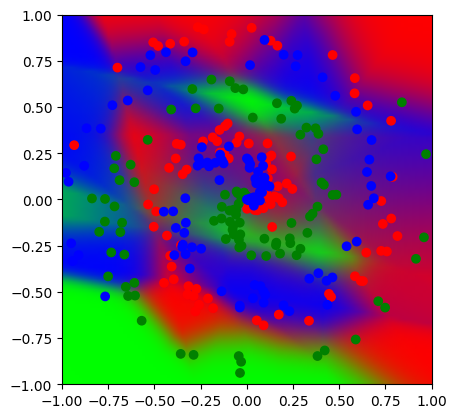

In [46]:
#SOL 27

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD()

for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    if epoch % 100 == 0:
        print(f"epoch:{epoch}  Pérdidas = {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Actualización de parámetros con el optimizador
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 28: Misma solución utilizando ```keras```

Busca documentación sobre cómo implementar redes neuronales con el módulo ```tf.keras``` (echa un vistazo por ejemplo a [este enlace](https://stackoverflow.com/questions/64689483/how-to-do-multiclass-classification-with-keras), o [este otro](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)). Crear una arquitectura similar a la usada en el ejercicio anterior, directamente usando las herramientas disponibles en dicho paquete.

In [47]:
%pip install -q tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!# PEDIDO
# SOL EJ 28

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy

nnfs.init()

X, y = spiral_data(samples=100, classes=3)
print(len(X))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=SGD(learning_rate=1.0, momentum=0.0), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(X, y, epochs=10000, verbose=1, batch_size=len(X))


300
Epoch 1/10000


c:\Users\mgonz\anaconda3\envs\python-3-10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.3200 - loss: 1.1012
Epoch 2/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3667 - loss: 1.0951
Epoch 3/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4167 - loss: 1.0916
Epoch 4/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4200 - loss: 1.0893
Epoch 5/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4200 - loss: 1.0876
Epoch 6/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4200 - loss: 1.0861
Epoch 7/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4267 - loss: 1.0849
Epoch 8/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4233 - loss: 1.0839
Epoch 9/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4267 - loss: 1.0831
Epoch 10/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4267 - loss: 1.0823
Epoch 11/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4300 - loss: 1.0816
Epoch 12/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


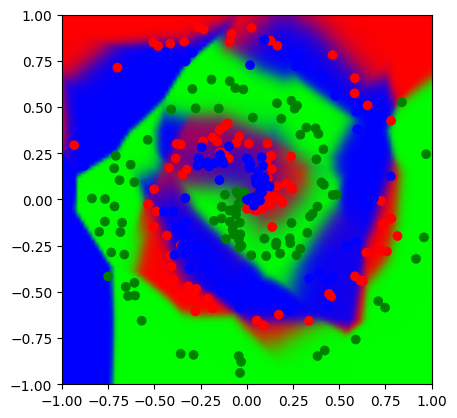

In [63]:
def plot_prediction_performance_spiral_keras(
        model,
        X, y,
        num_points: int = 100,
        ) -> None:
    """Plots the performance of the Keras model in the spiral dataset with 3 categories"""

    def probabilities_to_rgb(probabilities_array):
        """ Maps an array of probabilities to RGB colors."""

        # Ensure that probabilities sum up to 1 for all data points
        if not np.all(np.isclose(np.sum(probabilities_array, axis=1), 1.0)):
            raise ValueError("Probabilities must sum up to 1 for all data points.")

        # Map probabilities to RGB channels (0-255) for all data points
        r, g, b = (probabilities_array * 255).astype(int).T

        # Return the RGB colors as a NumPy array
        return np.column_stack((r, g, b))

    # Create a meshgrid of points in the (-1,1)x(-1,1) space
    x_val = np.linspace(-1, 1, num_points)
    y_val = np.linspace(-1, 1, num_points)

    x_grid, y_grid = np.meshgrid(x_val, y_val)

    # Flatten the grids into 1D arrays
    x_flat = x_grid.flatten()
    y_flat = y_grid.flatten()

    # Combine the flattened arrays into an Nx2 array
    XX_tuples = np.column_stack((x_flat, y_flat))

    # Perform a forward pass using the Keras model
    probabilities_array = model.predict(XX_tuples)

    # Convert probabilities to RGB colors
    rgb_colors = probabilities_to_rgb(probabilities_array)
    probs_2d = rgb_colors.reshape(num_points, num_points, 3)

    # Assumed 3 categories - change this if different
    colors = ['r' if label == 0 else 'g' if label == 1 else 'b' for label in y]

    # Plot the decision regions
    plt.imshow(probs_2d, extent=(-1, 1, -1, 1), interpolation='bilinear')
    plt.scatter(X[:, 0], -X[:, 1], c=colors)
    plt.show()


plot_prediction_performance_spiral_keras(model, X, y)


## Ejercicio 29: *Learning rate decay*

 - **29.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 26 para que incluya un mecanismo que aplique el decaimiento de la tasa de aprendizaje. Ahora, además del argumento ```learning_rate```, el constructor de la clase recibirá el ```decay```. En dicho constructor, inicializa también dos variables adicionales: ```self.current_learning_rate``` (para ir almacenando el *learning rate* en sucesivas iteraciones) y ```self.iterations``` (para ir almacenando el número de iteraciones). Actualiza el método ```update_params``` e implementa dos nuevos métodos:
   - ```pre_update_params(self)```: responsable de actualizar ```self.current_learning_rate```. Está pensado para será ejecutado justo antes de la llamada a ```update_params```.
   - ```post_update_params(self)```: responsable de actualizar ```self.iterations```. Está pensado para será ejecutado justo después de la llamada a ```update_params```.


In [57]:
# SOL EJ 29a

class Optimizer_SGD:

    def __init__(self, learning_rate=1.0, decay=0.0):
        self.learning_rate = learning_rate
        self.decay = decay
        self.current_learning_rate = learning_rate
        self.iterations = 0

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    def post_update_params(self):
        self.iterations += 1

  - **29.b** Partiendo del código al que llegaste en el ejercicio 27, prueba el mecanismo de *Learning rate decay* que acabas de implementar. Experimenta con un *decay* de $10^{-2}$ y de $10^{-3}$ ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 27? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoch:0  Pérdidas = 1.098594307899475
epoch:100  Pérdidas = 1.088205099105835
epoch:200  Pérdidas = 1.0777205228805542
epoch:300  Pérdidas = 1.0764548778533936
epoch:400  Pérdidas = 1.0755491256713867
epoch:500  Pérdidas = 1.0741554498672485
epoch:600  Pérdidas = 1.0723166465759277
epoch:700  Pérdidas = 1.0703470706939697
epoch:800  Pérdidas = 1.0682345628738403
epoch:900  Pérdidas = 1.0658538341522217
epoch:1000  Pérdidas = 1.0631405115127563
epoch:1100  Pérdidas = 1.059455156326294
epoch:1200  Pérdidas = 1.0557358264923096
epoch:1300  Pérdidas = 1.051923394203186
epoch:1400  Pérdidas = 1.0476053953170776
epoch:1500  Pérdidas = 1.040504813194275
epoch:1600  Pérdidas = 1.032575249671936
epoch:1700  Pérdidas = 1.0250996351242065
epoch:1800  Pérdidas = 1.017133355140686
epoch:1900  Pérdidas = 1.008447289466858
epoch:2000  Pérdidas = 0.999559760093689
epoch:2100  Pérdidas = 1.0048989057540894
epoch:2200  Pérdidas = 1.0087372064590454
epoch:2300  Pérdidas = 1.0062755346298218
epoch:2400  P

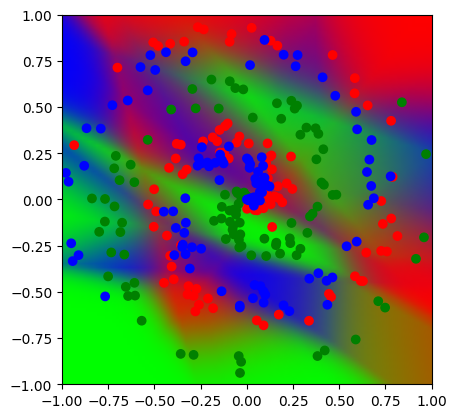

In [64]:
# SOL EJ 29b

#SOL 27

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay=1e-3)

for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    if epoch % 100 == 0:
        print(f"epoch:{epoch}  Pérdidas = {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Actualización de parámetros con el optimizador
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 30: Descenso de gradiente con momentum

 - **30.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 29 para que incluya el mecanismo de *momentum*. Sigue la siguiente plantilla de desarrollo:

In [65]:
# SOL EJ 30a -> completa las líneas con ######

# Optimizador SGD con momentum
class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):

        # Si usamos momentum, creamos arrays de momentum si no existen. Inicializados en ceros
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Calcular actualizaciones de pesos y sesgos con momentum
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Calcular actualizaciones de pesos y sesgos sin momentum (como en ejercicios anteriores)
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Actualizar pesos y sesgos usando actualizaciones con o sin momentum
        layer.weights += weight_updates
        layer.biases += bias_updates


    def post_update_params(self):
        self.iterations += 1

  - **30.b** Partiendo del código al que llegaste en el ejercicio 29, prueba el mecanismo de momentum que acabas de implementar. Probar con un *decay* de $10^{-3}$ y un *momentum* de $0.5$ y luego de $0.9$. ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 29? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoch:0  Pérdidas = 1.098594307899475
epoch:100  Pérdidas = 1.0534671545028687
epoch:200  Pérdidas = 0.9551739692687988
epoch:300  Pérdidas = 0.7628453373908997
epoch:400  Pérdidas = 0.7322490215301514
epoch:500  Pérdidas = 0.6663029789924622
epoch:600  Pérdidas = 0.5637745261192322
epoch:700  Pérdidas = 0.5129256248474121
epoch:800  Pérdidas = 0.6036384105682373
epoch:900  Pérdidas = 0.4415970742702484
epoch:1000  Pérdidas = 0.44723835587501526
epoch:1100  Pérdidas = 0.5344828367233276
epoch:1200  Pérdidas = 0.38977304100990295
epoch:1300  Pérdidas = 0.3607647120952606
epoch:1400  Pérdidas = 0.41145092248916626
epoch:1500  Pérdidas = 0.3946501612663269
epoch:1600  Pérdidas = 0.31101807951927185
epoch:1700  Pérdidas = 0.3008284568786621
epoch:1800  Pérdidas = 0.4825432300567627
epoch:1900  Pérdidas = 0.30999353528022766
epoch:2000  Pérdidas = 0.28176403045654297
epoch:2100  Pérdidas = 0.26234668493270874
epoch:2200  Pérdidas = 0.2491002380847931
epoch:2300  Pérdidas = 0.238018140196800

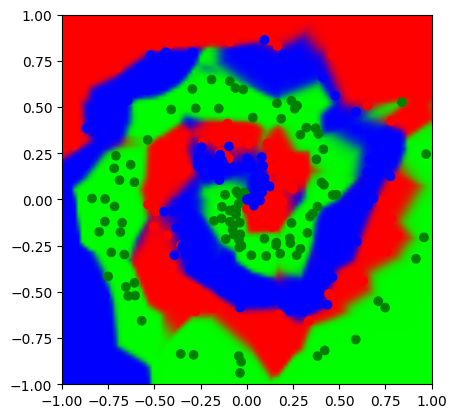

In [66]:
# SOL EJ 30b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay=1e-3, momentum=0.9)

for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    if epoch % 100 == 0:
        print(f"epoch:{epoch}  Pérdidas = {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Actualización de parámetros con el optimizador
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 31: RMS Prop

 - **31.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_RMSprop``` que implemente este optimizador. RMSProp utiliza una media móvil de la caché:

    ```python
    cache = rho * cache + (1 - rho) * gradient ** 2
    ```

    Que luego se usará en la actualización de cada parámetro individual como:

    ```python
    parm_updates = learning_rate * parm_gradient / (sqrt(cache) + eps)
    ```
    Sigue la siguiente plantilla de desarrollo:

In [67]:
# <- PEDIDO
# SOL EJ 31a

# RMSprop con momentum
class Optimizer_RMSprop:

    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    def pre_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    # Actualizar parámetros usando RMSprop con momentum
    def update_params(self, layer):
        # Si los arrays de caché no existen, crearlos llenos de ceros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Actualizar la caché con los gradientes actuales al cuadrado
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2

        # Actualizar pesos y sesgos usando RMSprop con momentum
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        self.iterations += 1


  - **31.b** Partiendo del código al que llegaste en el ejercicio 30, prueba el optimizador que acabas de implementar. Prueba primero con un *decay* de $10^{-4}$ y el resto de parámetros por defecto. Prueba luego con ```learning_rate=0.02, decay=1e-5, rho=0.999``` ¿Se consigue mejorar los resultados en comparación con los del ejercicio 30? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoch:0  Pérdidas = 1.098594307899475
epoch:100  Pérdidas = 1.0774517059326172
epoch:200  Pérdidas = 1.0716205835342407
epoch:300  Pérdidas = 1.062160611152649
epoch:400  Pérdidas = 1.0509488582611084
epoch:500  Pérdidas = 1.0360888242721558
epoch:600  Pérdidas = 1.0209324359893799
epoch:700  Pérdidas = 1.0057893991470337
epoch:800  Pérdidas = 0.9907599091529846
epoch:900  Pérdidas = 0.9758990406990051
epoch:1000  Pérdidas = 0.9613081812858582
epoch:1100  Pérdidas = 0.9483176469802856
epoch:1200  Pérdidas = 0.9365929961204529
epoch:1300  Pérdidas = 0.9259381294250488
epoch:1400  Pérdidas = 0.9164244532585144
epoch:1500  Pérdidas = 0.9075927734375
epoch:1600  Pérdidas = 0.8997896313667297
epoch:1700  Pérdidas = 0.8927996754646301
epoch:1800  Pérdidas = 0.8862743377685547
epoch:1900  Pérdidas = 0.8802488446235657
epoch:2000  Pérdidas = 0.8744475245475769
epoch:2100  Pérdidas = 0.8685599565505981
epoch:2200  Pérdidas = 0.8627159595489502
epoch:2300  Pérdidas = 0.856843888759613
epoch:2400

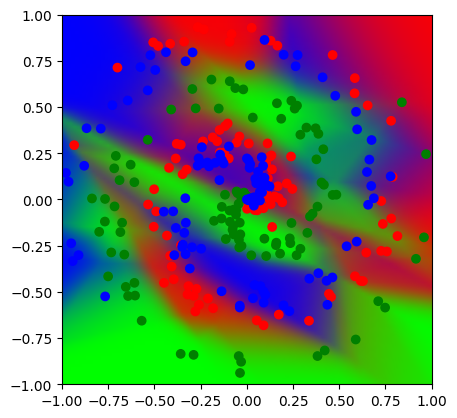

In [69]:
# SOL EJ 31b


nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_RMSprop(decay=1e-4)

for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    if epoch % 100 == 0:
        print(f"epoch:{epoch}  Pérdidas = {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Actualización de parámetros con el optimizador
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

epoch:0  Pérdidas = 1.098594307899475
epoch:100  Pérdidas = 1.0134366750717163
epoch:200  Pérdidas = 0.9601768255233765
epoch:300  Pérdidas = 0.9031939506530762
epoch:400  Pérdidas = 0.8426470160484314
epoch:500  Pérdidas = 0.8019272685050964
epoch:600  Pérdidas = 0.7642881274223328
epoch:700  Pérdidas = 0.7534891366958618
epoch:800  Pérdidas = 0.8307912349700928
epoch:900  Pérdidas = 0.788240909576416
epoch:1000  Pérdidas = 0.6372529864311218
epoch:1100  Pérdidas = 0.6118232011795044
epoch:1200  Pérdidas = 0.5557571649551392
epoch:1300  Pérdidas = 0.5589865446090698
epoch:1400  Pérdidas = 0.5458976030349731
epoch:1500  Pérdidas = 0.5661225318908691
epoch:1600  Pérdidas = 0.5369582176208496
epoch:1700  Pérdidas = 0.4805288314819336
epoch:1800  Pérdidas = 0.48022302985191345
epoch:1900  Pérdidas = 0.4636763036251068
epoch:2000  Pérdidas = 0.46712154150009155
epoch:2100  Pérdidas = 0.4668104946613312
epoch:2200  Pérdidas = 0.4382455050945282
epoch:2300  Pérdidas = 0.43903759121894836
epo

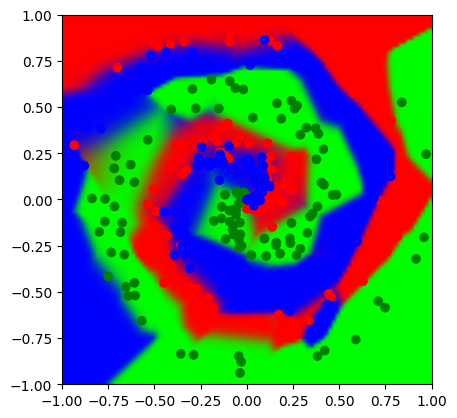

In [72]:
# SOL EJ 31b


nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_RMSprop(decay=1e-5, learning_rate=0.02, rho=0.999)

for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    if epoch % 100 == 0:
        print(f"epoch:{epoch}  Pérdidas = {loss}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Actualización de parámetros con el optimizador
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Mientras que **SGD** tiene una tasa de aprendizaje fija y todos los parámetros del modelo se actualizan con la misma magnitud para un gradiente dado, **RMSProp** va ajustándolo de manera dinámica basándose en la magnitud acumulada del gradiente más reciente (es lo que almacena en caché).

El aumentar el valor ```rho```, el optimizador prioriza más los valores guardados en caché. De esta forma, se acelera la convergencia en las etapas finales del entrenamiento al evitar que el optimizador haga oscilaciones alrededor del mínimo.

Al aumentar el ```learning_rate``` permite pasos más grandes en las etapas iniciales, ayudando a explorar el espacio de soluciones más rápidamente.

En cuanto al ```decay```, hace que el ```learning_rate``` se reduzca más lentamente y permite explorar el espacio de soluciones más pausadamente.

## Ejercicio 32: Adam

 - **32.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_Adam``` que implemente este optimizador. Adam añade a RMSProp el mecanismo de momentum ($\beta_1$). También añade además un mecanismo de corrección de sesgo, dividiendo tanto el momentum como el caché por $1-\beta_1^{step}$.

In [73]:
# SOL EJ 32a

# Optimizador Adam
class Optimizer_Adam:

    # Inicializar el optimizador - establecer configuraciones
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1  # momentum, y para la corrección descrita arriba
        self.beta_2 = beta_2  # renombrar el antiguo rho de RMSProp -> usado para la caché

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):

        # Si la capa no contiene arrays de caché, crearlos llenos de ceros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Actualizar el momentum con los gradientes actuales
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1.0 - self.beta_1) * layer.dweights # m_t
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1.0 - self.beta_1) * layer.dbiases # m_t

        # Actualizar la caché con los gradientes actuales al cuadrado
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1.0 - self.beta_2) * layer.dweights**2  # v_t
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1.0 - self.beta_2) * layer.dbiases**2  # v_t

        # Obtener el momentum y la caché corregidos (self.iteration es 0 en el primer paso, y necesitamos empezar con 1 aquí) -> así que dividir por (1 - self.beta_1 ** (self.iterations + 1))
        weight_momentums_corrected = layer.weight_momentums / (1.0 - self.beta_1**(self.iterations + 1)) # m hat
        bias_momentums_corrected = layer.bias_momentums / (1.0 - self.beta_1**(self.iterations + 1))
        weight_cache_corrected = layer.weight_cache / (1.0 - self.beta_2**(self.iterations + 1)) # v hat
        bias_cache_corrected = layer.bias_cache / (1.0 - self.beta_2**(self.iterations + 1)) # v hat

        # Actualización de parámetros de SGD + normalización con la caché enraizada
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

  - **32.b** Partiendo del código al que llegaste en el ejercicio 31, prueba el optimizador que acabas de implementar. Prueba primero con ```Optimizer_Adam(learning_rate=0.02, decay=1e-5)```, y luego con ```Optimizer_Adam(learning_rate=0.05, decay=5e-7)```. ¿Se consigue mejorar los resultados en comparación con los del ejercicio 31? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoch:0  Pérdidas = 1.098594307899475  accuracy = 0.36
epoch:100  Pérdidas = 0.7691511511802673  accuracy = 0.6733333333333333
epoch:200  Pérdidas = 0.5516485571861267  accuracy = 0.8133333333333334
epoch:300  Pérdidas = 0.4452868700027466  accuracy = 0.84
epoch:400  Pérdidas = 0.3801632821559906  accuracy = 0.8633333333333333
epoch:500  Pérdidas = 0.33563119173049927  accuracy = 0.8733333333333333
epoch:600  Pérdidas = 0.3084203004837036  accuracy = 0.89
epoch:700  Pérdidas = 0.28723517060279846  accuracy = 0.89
epoch:800  Pérdidas = 0.2691740393638611  accuracy = 0.9066666666666666
epoch:900  Pérdidas = 0.2498081922531128  accuracy = 0.91
epoch:1000  Pérdidas = 0.23817509412765503  accuracy = 0.9133333333333333
epoch:1100  Pérdidas = 0.23003412783145905  accuracy = 0.91
epoch:1200  Pérdidas = 0.21857813000679016  accuracy = 0.9133333333333333
epoch:1300  Pérdidas = 0.20976920425891876  accuracy = 0.92
epoch:1400  Pérdidas = 0.20235088467597961  accuracy = 0.91
epoch:1500  Pérdidas = 

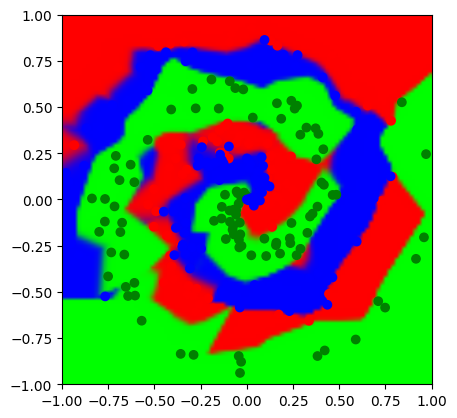

In [74]:
# SOL EJ 32b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    # Cálculo de la accuracy <- entender!
    predictions = np.argmax(loss_activation.output, axis=1)
    accuracy = np.mean(predictions==y)

    if epoch % 100 == 0:
        print(f"epoch:{epoch}  Pérdidas = {loss}  accuracy = {accuracy}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Actualización de parámetros con el optimizador
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

epoch:0  Pérdidas = 1.098594307899475  accuracy = 0.36
epoch:100  Pérdidas = 0.7050226926803589  accuracy = 0.67
epoch:200  Pérdidas = 0.5223735570907593  accuracy = 0.7966666666666666
epoch:300  Pérdidas = 0.4298107326030731  accuracy = 0.8466666666666667
epoch:400  Pérdidas = 0.34374159574508667  accuracy = 0.8866666666666667
epoch:500  Pérdidas = 0.30293700098991394  accuracy = 0.91
epoch:600  Pérdidas = 0.27604541182518005  accuracy = 0.9066666666666666
epoch:700  Pérdidas = 0.2522711753845215  accuracy = 0.9166666666666666
epoch:800  Pérdidas = 0.2446342259645462  accuracy = 0.92
epoch:900  Pérdidas = 0.22839798033237457  accuracy = 0.93
epoch:1000  Pérdidas = 0.2165888398885727  accuracy = 0.94
epoch:1100  Pérdidas = 0.20514555275440216  accuracy = 0.9366666666666666
epoch:1200  Pérdidas = 0.19242152571678162  accuracy = 0.9466666666666667
epoch:1300  Pérdidas = 0.18354347348213196  accuracy = 0.9466666666666667
epoch:1400  Pérdidas = 0.18314458429813385  accuracy = 0.94333333333

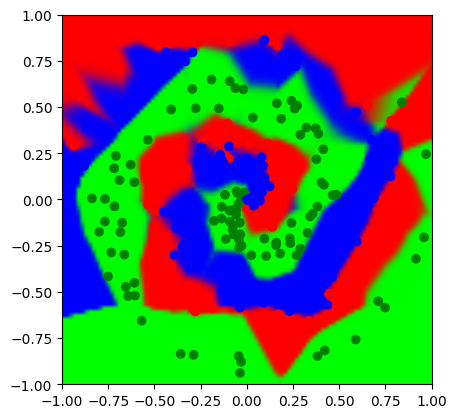

In [75]:
# SOL EJ 32b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-7)

for epoch in range(10000):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    # Cálculo de la accuracy <- entender!
    predictions = np.argmax(loss_activation.output, axis=1)
    accuracy = np.mean(predictions==y)

    if epoch % 100 == 0:
        print(f"epoch:{epoch}  Pérdidas = {loss}  accuracy = {accuracy}")

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Actualización de parámetros con el optimizador
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

 - **32.c** Interpreta los resultados que acabas de obtener. ¿Crees que la red ha aprendido correctamente la naturaleza de los datos de entrenamiento? Si no es así, investiga qué puede estar pasando y discute posibles soluciones (no es necesario implementar nada).

Sí, la red ha terminado con un _96%_ de precisión y una tasa de pérdida del _0.08_, lo que significa que, en su mayoría, clasifica de forma correcta, superando tanto a **SGD** como a **RMSProp**.

El optimizador **Adam** combina el ajuste dinámico de RMSProp con el momentum de SGD, lo que permite actualizaciones adaptadas a la magnitud de los gradientes, optimizando la dirección y el tamaño de los cambios en cada iteración. Además, corrige el sesgo inicial de los gradientes, lo que lo hace más efectivo desde las primeras etapas.

Adam resuelve este problema de sesgo inicial mediante una corrección de sesgo en sus momentos de gradientes, especialmente en las primeras etapas del entrenamiento.

En el primer momento del SGD (promedio de gradientes), Adam calcula el promedio de los gradientes de las iteraciones anteriores. Este promedio comienza con valores muy pequeños, lo que genera un sesgo hacia cero. Para corregir esto, Adam realiza una normalización de los momentos, usando un término de corrección que ajusta los valores en función del número de iteraciones. Esto asegura que el valor promedio de los gradientes no se vea afectado por este sesgo inicial.

El segundo momento relacionado con el RMSProp (promedio de los gradientes al cuadrado), similar al primer momento, también empieza siendo muy pequeño y sesgado. Adam corrige este sesgo aplicando una corrección similar a la que aplica sobre el primer momento, asegurando que el promedio de los gradientes al cuadrado refleje de manera más precisa su valor real a medida que avanza el entrenamiento.

En cuanto a los resultados, el segundo optimizador Adam (```learning_rate``` mayor y ```decay``` menor) alcanza el mínimo más rápido que el primer optimizador Adam porque los ajustes son mayores. 
